In [37]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [38]:
# Read the data into a Pandas DataFrame that Brian did the tranformation on 
# Still need to scale the data and transform the lable column into number values. Will focus on Bi-Polar Disorder
cleaned_mental_df = pd.read_csv('mental_health_data.csv')
cleaned_mental_df.head()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,2,0,1,1,1,1,0,0,1,0,0,1,1,1,3,3,4,Bipolar Type-2
1,2,0,2,1,0,1,0,0,0,0,0,0,0,0,4,2,5,Depression
2,1,3,1,1,1,0,0,0,1,1,0,1,1,0,6,5,7,Bipolar Type-1
3,2,0,2,3,1,1,1,0,1,0,0,0,0,0,3,2,2,Bipolar Type-2
4,2,2,1,1,0,0,0,0,0,0,0,1,1,1,5,5,6,Normal


>### <font color=purple> Scale the data </font>

In [39]:
# View column names of dataframe (copy and paste for scaling)
cleaned_mental_df.columns


Index(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim', 'Expert Diagnose'],
      dtype='object')

In [40]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_mental_data = StandardScaler().fit_transform(
   cleaned_mental_df[['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']]
)

#reveiw scaled data
scaled_mental_data

array([[ 0.4888129 , -1.01499921, -0.62336978, ..., -0.86993517,
        -0.69831676, -0.23533567],
       [ 0.4888129 , -1.01499921,  0.36089829, ..., -0.37045086,
        -1.25697016,  0.26895505],
       [-0.59743799,  2.24749824, -0.62336978, ...,  0.62851775,
         0.41899005,  1.27753648],
       ...,
       [ 0.4888129 ,  0.07249994,  0.36089829, ..., -1.86890378,
         0.41899005, -0.73962638],
       [ 0.4888129 ,  0.07249994, -1.60763785, ...,  1.12800206,
         1.53629687,  1.27753648],
       [-0.59743799,  1.15999909, -1.60763785, ...,  1.12800206,
        -0.69831676,  1.7818272 ]])

In [41]:
# Create a DataFrame with the scaled data
df_mental_scaled = pd.DataFrame(
   scaled_mental_data,
    columns=['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim']
)
df_mental_scaled.head()  

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,0.488813,-1.014999,-0.623370,-0.470670,1.051315,1.051315,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,0.967204,1.016808,0.919866,-0.869935,-0.698317,-0.235336
1,0.488813,-1.014999,0.360898,-0.470670,-0.951190,1.051315,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.370451,-1.256970,0.268955
2,-0.597438,2.247498,-0.623370,-0.470670,1.051315,-0.951190,-0.788430,-0.802394,1.051315,1.033908,-0.845154,0.967204,1.016808,-1.087115,0.628518,0.418990,1.277536
3,0.488813,-1.014999,0.360898,1.583164,1.051315,1.051315,1.268344,-0.802394,1.051315,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.869935,-1.256970,-1.243917
4,0.488813,1.159999,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,0.967204,1.016808,0.919866,0.129033,0.418990,0.773246


In [42]:
# Drop all columns except for the target "Expert Diagnose"
only_target_df = cleaned_mental_df.drop(['Sadness', 'Euphoric', 'Exhausted', 'Sleep dissorder', 'Mood Swing',
       'Suicidal thoughts', 'Anorxia', 'Authority Respect', 'Try-Explanation',
       'Aggressive Response', 'Ignore & Move-On', 'Nervous Break-down',
       'Admit Mistakes', 'Overthinking', 'Sexual Activity', 'Concentration',
       'Optimisim'], axis = 1)
only_target_df.head()

,Expert Diagnose
0,Bipolar Type-2
1,Depression
2,Bipolar Type-1
3,Bipolar Type-2
4,Normal


In [43]:
new_target_df = only_target_df.rename(columns={"Expert Diagnose": 'Expert_Diagnosis'})
new_target_df.head()

,Expert_Diagnosis
0,Bipolar Type-2
1,Depression
2,Bipolar Type-1
3,Bipolar Type-2
4,Normal


In [44]:
# Verify the categories of the "Expert_Diagnosis" column
new_target_df["Expert_Diagnosis"].value_counts()

Expert_Diagnosis
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [45]:
# Encode Target Values for Bi-Polar Disorder
#edited new_target_df so that depression has a value of 1 and the rest are 0

new_target_df['Expert_Diagnosis'].replace('Depression', '1', inplace=True)
new_target_df['Expert_Diagnosis'].replace('Bipolar Type-2', '0', inplace=True)
new_target_df['Expert_Diagnosis'].replace('Bipolar Type-1', '0', inplace=True)
new_target_df['Expert_Diagnosis'].replace('Normal', '0', inplace=True)



new_target_df.head()

,Expert_Diagnosis
0,0
1,1
2,0
3,0
4,0


In [46]:
#check to make sure the 0 and 1 values were replaced correctly 
new_target_df["Expert_Diagnosis"].value_counts()

Expert_Diagnosis
0    89
1    31
Name: count, dtype: int64

In [47]:
#check the Expert Diagnosis column Variable type
new_target_df.dtypes

Expert_Diagnosis    object
dtype: object

In [48]:
# Convert values to variable for the model to run 
new_target_df['Expert_Diagnosis'] = new_target_df['Expert_Diagnosis'].astype(int)

In [49]:
new_target_df.dtypes

Expert_Diagnosis    int64
dtype: object

In [50]:
# Concatenate the scaled data with the new_target_df
# Expert_Diagnosis column, all the 1's are in rows where the Diagnosis was Bipolar Type 1 or 2.
Depression_final_df = pd.concat([df_mental_scaled, new_target_df], axis=1)
# Display sample data
Depression_final_df.head(8)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert_Diagnosis
0,0.488813,-1.014999,-0.623370,-0.470670,1.051315,1.051315,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,0.967204,1.016808,0.919866,-0.869935,-0.698317,-0.235336,0
1,0.488813,-1.014999,0.360898,-0.470670,-0.951190,1.051315,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.370451,-1.256970,0.268955,1
2,-0.597438,2.247498,-0.623370,-0.470670,1.051315,-0.951190,-0.788430,-0.802394,1.051315,1.033908,-0.845154,0.967204,1.016808,-1.087115,0.628518,0.418990,1.277536,0
3,0.488813,-1.014999,0.360898,1.583164,1.051315,1.051315,1.268344,-0.802394,1.051315,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.869935,-1.256970,-1.243917,0
4,0.488813,1.159999,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,0.967204,1.016808,0.919866,0.129033,0.418990,0.773246,0
5,0.488813,0.072500,-0.623370,1.583164,-0.951190,1.051315,1.268344,1.246271,-0.951190,-0.967204,-0.845154,-1.033908,1.016808,-1.087115,-0.869935,0.418990,0.268955,1
6,-1.683689,1.159999,-1.607638,-0.470670,1.051315,1.051315,1.268344,-0.802394,1.051315,1.033908,-0.845154,0.967204,1.016808,0.919866,1.128002,-1.256970,2.286118,0
7,0.488813,0.072500,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,-1.033908,-0.983470,0.919866,0.129033,0.418990,0.268955,0


In [51]:
# final check to make sure all numeric values and ready to run model
Depression_final_df.dtypes

Sadness                float64
Euphoric               float64
Exhausted              float64
Sleep dissorder        float64
Mood Swing             float64
Suicidal thoughts      float64
Anorxia                float64
Authority Respect      float64
Try-Explanation        float64
Aggressive Response    float64
Ignore & Move-On       float64
Nervous Break-down     float64
Admit Mistakes         float64
Overthinking           float64
Sexual Activity        float64
Concentration          float64
Optimisim              float64
Expert_Diagnosis         int64
dtype: object

>### <font color=purple> Create the labels set (y) from the “Expert_Diagnosis” column, and then create the features (X) DataFrame from the remaining columns. </font>

In [52]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = Depression_final_df["Expert_Diagnosis"]

# Separate the X variable, the features
# all columns but the Expert_Diagnosis
X = Depression_final_df.drop(columns="Expert_Diagnosis")

In [53]:
# Review the y variable Series
y[:10]

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Expert_Diagnosis, dtype: int64

In [54]:
# Review the X variable DataFrame
X[:10]

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim
0,0.488813,-1.014999,-0.623370,-0.470670,1.051315,1.051315,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,0.967204,1.016808,0.919866,-0.869935,-0.698317,-0.235336
1,0.488813,-1.014999,0.360898,-0.470670,-0.951190,1.051315,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.370451,-1.256970,0.268955
2,-0.597438,2.247498,-0.623370,-0.470670,1.051315,-0.951190,-0.788430,-0.802394,1.051315,1.033908,-0.845154,0.967204,1.016808,-1.087115,0.628518,0.418990,1.277536
3,0.488813,-1.014999,0.360898,1.583164,1.051315,1.051315,1.268344,-0.802394,1.051315,-0.967204,-0.845154,-1.033908,-0.983470,-1.087115,-0.869935,-1.256970,-1.243917
4,0.488813,1.159999,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,-0.951190,-0.967204,-0.845154,0.967204,1.016808,0.919866,0.129033,0.418990,0.773246
5,0.488813,0.072500,-0.623370,1.583164,-0.951190,1.051315,1.268344,1.246271,-0.951190,-0.967204,-0.845154,-1.033908,1.016808,-1.087115,-0.869935,0.418990,0.268955
6,-1.683689,1.159999,-1.607638,-0.470670,1.051315,1.051315,1.268344,-0.802394,1.051315,1.033908,-0.845154,0.967204,1.016808,0.919866,1.128002,-1.256970,2.286118
7,0.488813,0.072500,-0.623370,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,-1.033908,-0.983470,0.919866,0.129033,0.418990,0.268955
8,1.575064,-1.014999,1.345166,0.556247,1.051315,1.051315,1.268344,-0.802394,1.051315,1.033908,-0.845154,0.967204,-0.983470,-1.087115,1.627486,-1.256970,-0.739626
9,0.488813,-1.014999,1.345166,-0.470670,-0.951190,-0.951190,-0.788430,-0.802394,1.051315,-0.967204,-0.845154,0.967204,1.016808,0.919866,-0.869935,-0.139663,-1.243917


>### <font color=purple> Split the data into training and testing datasets by using train_test_split </font>

In [55]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

>### <font color=purple> Create the Binary Logistic Regression Model </font>

In [56]:
# Step 1: Fit a logistic regression model by using the training data (X_train and y_train)
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_mod = LogisticRegression(random_state=1)

# Fit the model using training data
regression_model = logistic_regression_mod.fit(X_train, y_train)

In [57]:
# Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
# Make a prediction using the testing data
predict_testing = regression_model.predict(X_test)

>### <font color=purple> Evaluate the model's performance (confusion matrix and classification report) </font>

In [58]:
# Import dependency for confusion matrix 
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test, predict_testing)
print(" Confusion Matrix- Test Data: ")
print(testing_matrix)

# 4 true positive (occur when the model accurately predicts a positive data point.)
# 0 false negative  (occur when the model mispredicts a negative data point.)
# 1 false positive (occur when the model predicts a positive data point incorrectly)
# 25 true negative (occur when the model accurately predicts a negative data point.)

 Confusion Matrix- Test Data: 
[[25  1]
 [ 0  4]]


In [62]:
# Print the classification report for the model
# Precision is the Accuracy of positive predictions
# Recall is the ability of a classifier to find all positive instances.
# The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0

Classification_report_test = classification_report(y_test, predict_testing)
print(Classification_report_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.80      1.00      0.89         4

    accuracy                           0.97        30
   macro avg       0.90      0.98      0.93        30
weighted avg       0.97      0.97      0.97        30



>### <font color=purple> Model 1 (All Given Features): Bio-Polar Prediction Summary </font>
After scaling the data and utilizing all of the features listed in the original file, we are accurately able to predict the presence of Depression with a remarkable level of precision using a Binary Logistic Regression model. According to the confusion matrix and the detailed metrics provided by the classification report, this model demonstrates exceptional capability in diagnosing Depression, achieving an impressive recall of 1.00 for Depression, indicating it successfully identified all actual instances of this condition without any false negatives.

<Axes: ylabel='Feature'>

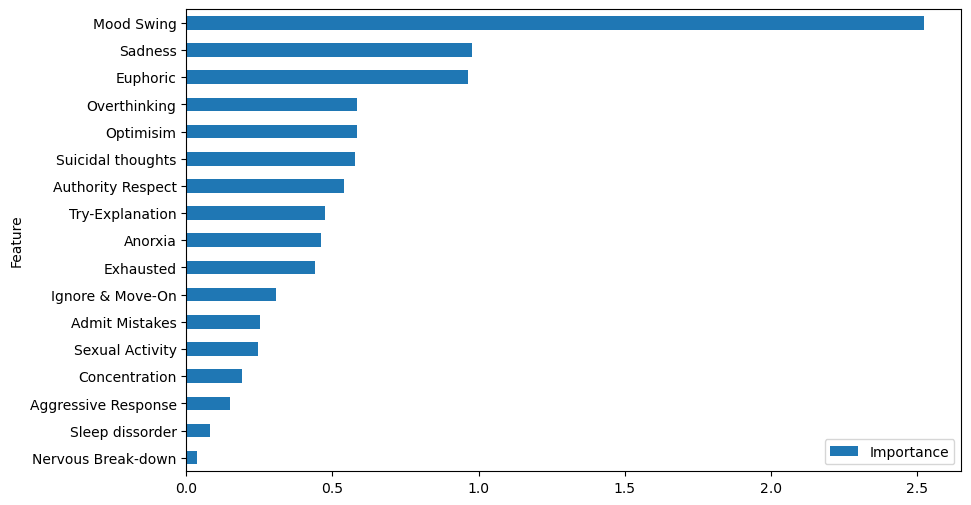

In [63]:
# The simplest way to calculate feature importance in binary logistic regression is using the model’s coefficients.
# The coefficients represent the change in the log odds for a one-unit change in the predictor variable.
# Larger absolute values indicate a stronger relationship between the predictor and the target variable.

coefficients = logistic_regression_mod.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

>### <font color=purple> Coefficients Summary- Least important features to be removed for next run of the model to predict Depression
</font>
After running the coefficient calculation across all of the features present in the first model, we can see that Nervous Break-down, Sleep dissorder, aggressive response, concentration, and sexual activity are the bottom 5 least important features. Let's remove all features but the top 5 (Mood Swing, Sadness, Euphoric, Overthinking, Optimism) and see how the model performs!?

>### <font color=purple> Model 2: 5 less features based on Coefficient Analysis </font>

In [68]:
# Drop all columns of least important features
# "Try-Explanation", "Authority Respect", "Admit Mistakes", "Sadness", "Exhausted", "Anorexia", "Sexual Activity", and "Over Thinking"
second_model_Depression_final_df = Depression_final_df.drop(['Suicidal thoughts','Authority Respect','Try-Explanation', 'Anorxia', 'Exhausted', 'Ignore & Move-On', 'Admit Mistakes', 'Sexual Activity', 'Concentration',
        'Aggressive Response', 'Sleep dissorder', 'Nervous Break-down'], axis = 1)
second_model_Depression_final_df.head()

,Sadness,Euphoric,Mood Swing,Overthinking,Optimisim,Expert_Diagnosis
0,0.488813,-1.014999,1.051315,0.919866,-0.235336,0
1,0.488813,-1.014999,-0.951190,-1.087115,0.268955,1
2,-0.597438,2.247498,1.051315,-1.087115,1.277536,0
3,0.488813,-1.014999,1.051315,-1.087115,-1.243917,0
4,0.488813,1.159999,-0.951190,0.919866,0.773246,0


>### <font color=purple> Create the labels set (y) from the “Expert_Diagnosis” column, and then create the features (X) DataFrame from the remaining columns. </font>

In [69]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = second_model_Depression_final_df["Expert_Diagnosis"]

# Separate the X variable, the features
# all columns but the Expert_Diagnosis
X = second_model_Depression_final_df.drop(columns="Expert_Diagnosis")

In [70]:
# Review the y variable Series
y[:10]

0    0
1    1
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    1
Name: Expert_Diagnosis, dtype: int64

In [71]:
# Review the X variable DataFrame
X[:10]

,Sadness,Euphoric,Mood Swing,Overthinking,Optimisim
0,0.488813,-1.014999,1.051315,0.919866,-0.235336
1,0.488813,-1.014999,-0.951190,-1.087115,0.268955
2,-0.597438,2.247498,1.051315,-1.087115,1.277536
3,0.488813,-1.014999,1.051315,-1.087115,-1.243917
4,0.488813,1.159999,-0.951190,0.919866,0.773246
5,0.488813,0.072500,-0.951190,-1.087115,0.268955
6,-1.683689,1.159999,1.051315,0.919866,2.286118
7,0.488813,0.072500,-0.951190,0.919866,0.268955
8,1.575064,-1.014999,1.051315,-1.087115,-0.739626
9,0.488813,-1.014999,-0.951190,0.919866,-1.243917


>### <font color=purple> Split the data into training and testing datasets by using train_test_split </font>

In [72]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

>### <font color=purple> Create the Binary Logistic Regression Model </font>

In [76]:
# Step 1: Fit a logistic regression model by using the training data (X_train and y_train)
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_mod = LogisticRegression(random_state=1)

# Fit the model using training data
regression_model = logistic_regression_mod.fit(X_train, y_train)

In [77]:
# Step 2: Save the predictions on the testing data labels by using the testing feature data (X_test) and the fitted model.
# Make a prediction using the testing data
predict_testing = regression_model.predict(X_test)

>### <font color=purple> Evaluate the model's performance (confusion matrix and classification report) </font>

In [78]:
# Generate a confusion matrix for the model
testing_matrix = confusion_matrix(y_test, predict_testing)
print(" Confusion Matrix- Test Data: ")
print(testing_matrix)

# 4 true positive (occur when the model accurately predicts a positive data point.)
# 0 false negative  (occur when the model mispredicts a negative data point.)
# 0 false positive (occur when the model predicts a positive data point incorrectly)
# 26 true negative (occur when the model accurately predicts a negative data point.)

 Confusion Matrix- Test Data: 
[[26  0]
 [ 0  4]]


In [79]:
# Print the classification report for the model
# Precision is the Accuracy of positive predictions
# Recall is the ability of a classifier to find all positive instances.
# The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0

Classification_report_test = classification_report(y_test, predict_testing)
print(Classification_report_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



>### <font color=purple> Model 2 (Only Top 5 Features): Depression Prediction Summary </font>
After refining the dataset to include only the five most critical features as determined by their coefficient values, our model achieved 100% accuracy in diagnosing Depression. This streamlined approach, focusing on key predictive features, underscores the model's robustness and precision. Given these results, employing this model as a tool for supporting the diagnosis of Depression appears to be highly reliable and effective.
